<a href="https://colab.research.google.com/github/prax1807/Git-to-do/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
dataset = tfds.load('cats_vs_dogs', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.6XDM6Y_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
train1 = dataset.take(2)

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

['image', 'image/filename', 'label']
tf.Tensor(b'PetImages/Dog/10396.jpg', shape=(), dtype=string)
(262, 350, 3) tf.Tensor(1, shape=(), dtype=int64)
['image', 'image/filename', 'label']
tf.Tensor(b'PetImages/Dog/4077.jpg', shape=(), dtype=string)
(409, 336, 3) tf.Tensor(1, shape=(), dtype=int64)


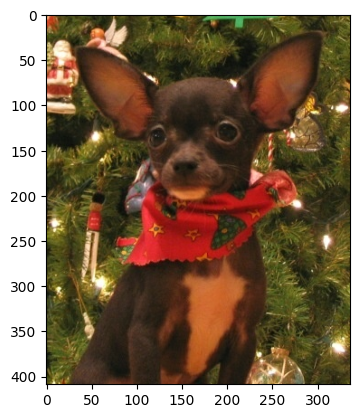

In [ ]:
for example in train1:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(list(example.keys()))
  image = example["image"]
  print(example["image/filename"])
  label = example["label"]
  plt.imshow(image)
  print(image.shape, label)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
data = []
labels = []
for dat in dataset:
    image = tf.image.resize(dat["image"], (64, 64)).numpy()
    image = image.flatten()  # Convert to 1D array
    data.append(image)
    labels.append(dat["label"].numpy())
train_data = np.array(data)
train_labels = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.32452628, -0.35208428, -0.40292594, ..., -1.2326741 ,
        -1.1858009 , -1.1332438 ],
       [ 1.2230418 ,  1.2937052 ,  1.3373536 , ...,  1.8938721 ,
         1.9917386 ,  2.0840304 ],
       [ 1.7417593 ,  1.7730169 ,  1.9782467 , ..., -0.4740303 ,
        -0.59064806, -0.37135714],
       ...,
       [ 0.9319235 ,  0.9438271 ,  1.1337706 , ...,  0.66996896,
         0.8569667 ,  1.1695865 ],
       [-0.527967  , -0.7879437 , -0.9418346 , ..., -1.218333  ,
        -1.1658272 , -1.0664675 ],
       [ 1.8023993 ,  1.89194   ,  1.9771641 , ...,  1.2404629 ,
         1.3294054 ,  1.5735126 ]], dtype=float32)

In [ ]:
try:
  import cuml
  from cuml.svm import SVC as cuSVC
  print("Using cuML for GPU accelerated SVM")
  svm_model = cuSVC(kernel='linear')
  svm_model.fit(X_train, y_train)
except ImportError:
  print("cuML not found, using scikit-learn's CPU implementation")
  svm_model = SVC(kernel='linear')
  svm_model.fit(X_train, y_train)

Using cuML for GPU accelerated SVM
[2025-03-08 14:30:09.896] [CUML] [warning] SVC with the linear kernel can be much faster using the specialized solver provided by LinearSVC. Consider switching to LinearSVC if tranining takes too long.


RuntimeError: exception occurred! file=/__w/cuml/cuml/cpp/src/svm/kernelcache.cuh line=444: Working set has already been initialized!
Obtained 49 stack frames
#1 in /usr/local/lib/python3.11/dist-packages/libcuml/lib64/libcuml++.so: ML::SVM::KernelCache<float, std::experimental::mdspan<float, std::experimental::extents<int, 18446744073709551615ul, 18446744073709551615ul>, std::experimental::layout_stride, raft::host_device_accessor<std::experimental::default_accessor<float>, (raft::memory_type)2> > >::InitWorkingSet(int const*) +0x3e6 [0x7c38e4ba0246]
#2 in /usr/local/lib/python3.11/dist-packages/libcuml/lib64/libcuml++.so: void ML::SVM::SmoSolver<float>::Solve<std::experimental::mdspan<float, std::experimental::extents<int, 18446744073709551615ul, 18446744073709551615ul>, std::experimental::layout_stride, raft::host_device_accessor<std::experimental::default_accessor<float>, (raft::memory_type)2> > >(std::experimental::mdspan<float, std::experimental::extents<int, 18446744073709551615ul, 18446744073709551615ul>, std::experimental::layout_stride, raft::host_device_accessor<std::experimental::default_accessor<float>, (raft::memory_type)2> >, int, int, float*, float const*, float**, int*, ML::SVM::SupportStorage<float>*, int**, float*, int, int) +0x441 [0x7c38e4bb52e1]
#3 in /usr/local/lib/python3.11/dist-packages/libcuml/lib64/libcuml++.so: void ML::SVM::svcFitX<float, std::experimental::mdspan<float, std::experimental::extents<int, 18446744073709551615ul, 18446744073709551615ul>, std::experimental::layout_stride, raft::host_device_accessor<std::experimental::default_accessor<float>, (raft::memory_type)2> > >(raft::handle_t const&, std::experimental::mdspan<float, std::experimental::extents<int, 18446744073709551615ul, 18446744073709551615ul>, std::experimental::layout_stride, raft::host_device_accessor<std::experimental::default_accessor<float>, (raft::memory_type)2> >, int, int, float*, ML::SVM::SvmParameter const&, raft::distance::kernels::KernelParams&, ML::SVM::SvmModel<float>&, float const*) +0xad9 [0x7c38e4bb8a09]
#4 in /usr/local/lib/python3.11/dist-packages/libcuml/lib64/libcuml++.so: void ML::SVM::svcFit<float>(raft::handle_t const&, float*, int, int, float*, ML::SVM::SvmParameter const&, raft::distance::kernels::KernelParams&, ML::SVM::SvmModel<float>&, float const*) +0x4b [0x7c38e4bb909b]
#5 in /usr/local/lib/python3.11/dist-packages/cuml/svm/svc.cpython-311-x86_64-linux-gnu.so(+0x2e44f) [0x7c380f0b144f]
#6 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x4a8f [0x541bcf]
#7 in /usr/bin/python3() [0x6135e4]
#8 in /usr/bin/python3: PyEval_EvalCode +0x97 [0x612c47]
#9 in /usr/bin/python3() [0x62ca33]
#10 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x390f [0x540a4f]
#11 in /usr/bin/python3() [0x6284b0]
#12 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x3485 [0x5405c5]
#13 in /usr/bin/python3() [0x6284b0]
#14 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x3485 [0x5405c5]
#15 in /usr/bin/python3() [0x6284b0]
#16 in /usr/bin/python3() [0x62aaec]
#17 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x3a9d [0x540bdd]
#18 in /usr/bin/python3() [0x585a87]
#19 in /usr/bin/python3() [0x58526e]
#20 in /usr/bin/python3: PyObject_Call +0xf4 [0x570704]
#21 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x4a8f [0x541bcf]
#22 in /usr/bin/python3() [0x6284b0]
#23 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x3485 [0x5405c5]
#24 in /usr/bin/python3() [0x6284b0]
#25 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x3485 [0x5405c5]
#26 in /usr/bin/python3() [0x6284b0]
#27 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x3485 [0x5405c5]
#28 in /usr/bin/python3() [0x6284b0]
#29 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x3485 [0x5405c5]
#30 in /usr/bin/python3() [0x6284b0]
#31 in /usr/lib/python3.11/lib-dynload/_asyncio.cpython-311-x86_64-linux-gnu.so(+0x745f) [0x7c3abe4f145f]
#32 in /usr/bin/python3() [0x553a1f]
#33 in /usr/bin/python3() [0x4d0bc0]
#34 in /usr/bin/python3() [0x4e94f3]
#35 in /usr/bin/python3() [0x54b25b]
#36 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x9129 [0x546269]
#37 in /usr/bin/python3() [0x6135e4]
#38 in /usr/bin/python3: PyEval_EvalCode +0x97 [0x612c47]
#39 in /usr/bin/python3() [0x62ca33]
#40 in /usr/bin/python3() [0x54b25b]
#41 in /usr/bin/python3: PyObject_Vectorcall +0x35 [0x54b145]
#42 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x6bf [0x53d7ff]
#43 in /usr/bin/python3: _PyFunction_Vectorcall +0x173 [0x5661a3]
#44 in /usr/bin/python3() [0x63e860]
#45 in /usr/bin/python3: Py_RunMain +0x13c [0x63e1bc]
#46 in /usr/bin/python3: Py_BytesMain +0x2d [0x603f2d]
#47 in /lib/x86_64-linux-gnu/libc.so.6(+0x29d90) [0x7c3abec27d90]
#48 in /lib/x86_64-linux-gnu/libc.so.6: __libc_start_main +0x80 [0x7c3abec27e40]
#49 in /usr/bin/python3: _start +0x25 [0x603db5]


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

In [ ]:
# prompt: do the same as the above cell and but use gpu drivers for the svm

import tensorflow_datasets as tfds
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Check for GPU availability
if tf.config.list_physical_devices('GPU'):
    print("GPU available")
    # Optionally, specify which GPU to use:
    # tf.config.experimental.set_visible_devices(tf.config.list_physical_devices('GPU')[0], 'GPU')
else:
    print("GPU not available. Using CPU.")


dataset = tfds.load('cats_vs_dogs', split='train')
train1 = dataset.take(2)
for example in train1:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(list(example.keys()))
  image = example["image"]
  print(example["image/filename"])
  label = example["label"]
  plt.imshow(image)
  print(image.shape, label)
data = []
labels = []
for dat in dataset:
    image = tf.image.resize(dat["image"], (64, 64)).numpy()
    image = image.flatten()  # Convert to 1D array
    data.append(image)
    labels.append(dat["label"].numpy())
train_data = np.array(data)
train_labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

# Use GPU if available for SVM (if cuML is available)
try:
  import cuml
  from cuml.svm import SVC as cuSVC
  print("Using cuML for GPU accelerated SVM")
  svm_model = cuSVC(kernel='linear')
  svm_model.fit(X_train, y_train)
except ImportError:
  print("cuML not found, using scikit-learn's CPU implementation")
  svm_model = SVC(kernel='linear')
  svm_model.fit(X_train, y_train)



In [ ]:
from sklearn.metrics import accuracy_score
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
